In [1]:
%matplotlib inline

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd
import matplotlib.pyplot as plt
from purano.models import Document, Info

In [2]:
engine = create_engine("sqlite:///news.db")
df = pd.read_sql("SELECT * FROM document WHERE date > '2016-01-01 00:00:00' ORDER BY Random() LIMIT 10000", engine.raw_connection())
df.head()

,id,url,date,edition,text,title,topics,authors,agency_id
0,729565,https://www.gazeta.ru/culture/news/2017/04/21/...,2017-04-23 11:26:38,None,Московский концерт группы «Мельница» называетс...,"Лидер «Мельницы»: честно говоря, новые книги М...",Культура,None,3
1,697627,https://www.gazeta.ru/auto/news/2017/03/01/n_9...,2017-03-02 14:28:59,None,"В Казани водитель насмерть сбил пешехода, пере...",В Казани водитель насмерть сбил пешехода,Авто,None,3
2,445303,https://www.interfax.ru/russia/553780,2017-03-15 19:59:00,None,Такие попытки он усмотрел в разжигании конфлик...,Патриарха Кирилла огорчили попытки расшатать с...,В России,None,1
3,643710,https://www.gazeta.ru/politics/news/2019/05/22...,2019-05-22 14:14:06,None,Верховная рада Украины отказалась рассматриват...,Рада отказалась рассматривать законопроект Зел...,Политика,None,3
4,602795,https://www.gazeta.ru/politics/news/2016/09/09...,2016-09-09 04:29:45,None,Кандидат в президенты США от Демократической п...,WSJ: Клинтон сделает свою кампанию более позит...,Политика,None,3


In [3]:
df["date_only"] = pd.to_datetime(df["date"]).dt.strftime("%Y-%m")
counts = df.groupby(["date_only", "agency_id"]).count()["id"]
counts = pd.DataFrame(counts)
counts.reset_index(inplace=True)
counts["count"] = counts["id"] 
counts.drop(["id"], inplace=True, axis=1)
counts.head()

,date_only,agency_id,count
0,2016-01,1,123
1,2016-01,2,34
2,2016-01,3,97
3,2016-02,1,138
4,2016-02,2,53


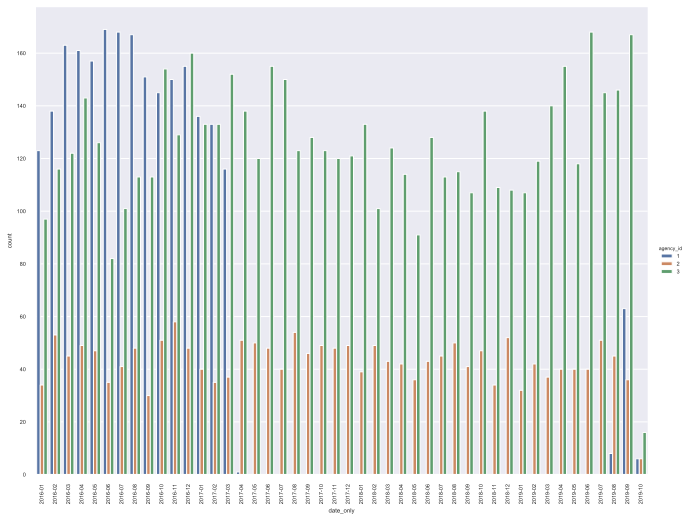

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import seaborn as sns

sns.set(font_scale=0.5)
graph = sns.catplot(x="date_only", y="count", hue="agency_id", data=counts, kind="bar", height=7, aspect=1.3)
for ax in graph.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [56]:
df[df.sort_values("date").duplicated(subset=["text", "title"], keep=False)]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,url,date,edition,text,title,topics,authors
1831,1832,https://www.interfax.ru/russia/649962,2019-02-11 00:23:00,None,Москва. 11 февраля. INTERFAX.RU - Молодая деву...,Девушка погибла под колесами электрички в Подм...,В России,None
1845,1846,https://www.interfax.ru/moscow/649984,2019-02-11 09:27:00,None,Москва. 11 февраля. INTERFAX.RU - Молодая деву...,Девушка погибла под колесами электрички в Подм...,Москва,None
12784,12785,https://www.interfax.ru/russia/12742,2008-05-12 18:01:00,None,Дели. 12 мая. INTERFAX.RU - Власти Мьянмы подт...,Жертвами урагана в Мьянме стали почти 32 тыс. ...,В России,None
12791,12792,https://www.interfax.ru/russia/12743,2008-05-12 19:02:00,None,Дели. 12 мая. INTERFAX.RU - Власти Мьянмы подт...,Жертвами урагана в Мьянме стали почти 32 тыс. ...,В России,None
14947,14948,https://www.interfax.ru/russia/9770,2008-04-19 12:45:00,None,Екатеринбург. 19 апреля. ИНТЕРФАКС-УРАЛ - Сост...,На Урале прекращена голодовка шахтеров СУБРа,В России,None
14972,14973,https://www.interfax.ru/russia/9794,2008-04-19 20:16:00,None,Екатеринбург. 19 апреля. ИНТЕРФАКС-УРАЛ - Сост...,На Урале прекращена голодовка шахтеров СУБРа,В России,None
19333,19334,https://www.interfax.ru/world/3721,2008-03-09 09:35:00,None,Москва. 9 марта. ИНТЕРФАКС-АВН - Первый европе...,"Европейский космический корабль ""Жюль Верн"" на...",В мире,None
19334,19335,https://www.interfax.ru/world/3722,2008-03-09 09:37:00,None,Москва. 9 марта. ИНТЕРФАКС-АВН - Первый европе...,"Европейский космический корабль ""Жюль Верн"" на...",В мире,None
21028,21029,https://www.interfax.ru/russia/1589,2008-02-21 00:46:00,None,Ереван. 21 февраля. INTERFAX.RU - Организаторы...,Армянская оппозиция планирует провести очередн...,В России,None
21030,21031,https://www.interfax.ru/russia/1022,2008-02-21 02:10:00,None,Ереван. 21 февраля. INTERFAX.RU - Организаторы...,Армянская оппозиция планирует провести очередн...,В России,None
